In [21]:
import warnings

import numpy as np
import pandas as pd

warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
from funcs import drop_corr_func_with_col
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

sns.set()

%config InlineBackend.figure_format = 'retina'

In [76]:
df = pd.read_csv('data/train.csv')

In [4]:
df.head(2)

0    1    2    3    4    5         6         7  8    9  ...         44  \
0  236  488   16  221  382   97 -4.472136  0.107472  0  132  ...  13.340874   
1  386  206  357  232    1  198  7.810250  0.763713  1  143  ...  12.484882   

         45        46         47         48         49        50        51  \
0  0.870542  1.962937   7.466666  11.547794   8.822916  9.046424  7.895535   
1  7.168680  2.885415  12.413973  10.260494  10.091351  9.270888  3.173994   

          52     target  
0  11.010677  20.107472  
1  13.921871  61.763713  

[2 rows x 54 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 54 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       90000 non-null  int64  
 1   1       90000 non-null  int64  
 2   2       90000 non-null  int64  
 3   3       90000 non-null  int64  
 4   4       90000 non-null  int64  
 5   5       90000 non-null  int64  
 6   6       90000 non-null  float64
 7   7       90000 non-null  float64
 8   8       90000 non-null  int64  
 9   9       90000 non-null  int64  
 10  10      90000 non-null  int64  
 11  11      90000 non-null  int64  
 12  12      90000 non-null  int64  
 13  13      90000 non-null  float64
 14  14      90000 non-null  float64
 15  15      90000 non-null  float64
 16  16      90000 non-null  float64
 17  17      90000 non-null  float64
 18  18      90000 non-null  float64
 19  19      90000 non-null  float64
 20  20      90000 non-null  float64
 21  21      90000 non-null  float64
 22

There is no null values

In [6]:
df.dtypes.value_counts()

float64    43
int64      11
dtype: int64

all values are numeric

In [3]:
df.describe()

0         1         2         3         4         5         6         7         8         9        10        11        12        13        14        15        16        17        18        19        20        21        22        23        24        25        26        27        28        29        30        31        32        33        34        35        36        37        38        39        40        41        42        43        44        45        46        47        48        49        50        51        52    target
count 90000.000 90000.000 90000.000 90000.000 90000.000 90000.000 90000.000 90000.000 90000.000 90000.000 90000.000 90000.000 90000.000 90000.000 90000.000 90000.000 90000.000 90000.000 90000.000 90000.000 90000.000 90000.000 90000.000 90000.000 90000.000 90000.000 90000.000 90000.000 90000.000 90000.000 90000.000 90000.000 90000.000 90000.000 90000.000 90000.000 90000.000 90000.000 90000.000 90000.000 90000.000 90000.000 90000.000 90000.000 90000.000 90000.000 90000.000 90000.000 90000.000 90000.000 90000.000 90000.000 90000.000 90000.000
mean    249.424   250.236   248.637   249.737   249.436   249.656    -0.011     0.499     0.499   249.842   249.819   249.347   249.900     7.484     7.498     7.496     7.502     7.486     7.523     7.476     7.495     7.504     7.508     7.509     7.472     7.519     7.516     7.509     7.497     7.504     7.494     7.491     7.487     7.515     7.492     7.520     7.508     7.494     7.514     7.507     7.480     7.520     7.502     7.513     7.475     7.524     7.508     7.473     7.491     7.475     7.509     7.487     7.513    50.034
std     144.336   144.022   144.108   144.285   143.942   144.329     7.038     0.289     0.500   144.613   144.364   144.476   144.310     4.331     4.318     4.339     4.346     4.318     4.323     4.327     4.325     4.330     4.333     4.329     4.345     4.339     4.334     4.331     4.335     4.319     4.327     4.323     4.330     4.330     4.333     4.335     4.330     4.327     4.334     4.328     4.326     4.316     4.334     4.330     4.330     4.322     4.332     4.336     4.332     4.323     4.326     4.325     4.333    28.897
min       0.000     0.000     0.000     0.000     0.000     0.000    -9.950     0.000     0.000     0.000     0.000     0.000     0.000     0.000     0.000     0.000     0.000     0.000     0.000     0.000     0.000     0.000     0.000     0.000     0.000     0.000     0.000     0.000     0.000     0.000     0.000     0.000     0.000     0.000     0.000     0.000     0.000     0.000     0.000     0.000     0.000     0.000     0.000     0.000     0.000     0.000     0.000     0.000     0.000     0.000     0.000     0.000     0.000     0.003
25%     125.000   126.000   124.000   125.000   125.000   124.000    -7.071     0.249     0.000   124.000   126.000   124.000   125.000     3.723     3.764     3.719     3.720     3.759     3.779     3.734     3.749     3.760     3.743     3.768     3.685     3.761     3.746     3.773     3.742     3.774     3.743     3.763     3.750     3.778     3.744     3.753     3.776     3.755     3.754     3.772     3.732     3.785     3.763     3.768     3.708     3.797     3.761     3.716     3.739     3.715     3.773     3.744     3.776    25.092
50%     250.000   251.000   248.000   250.000   250.000   250.000     0.000     0.497     0.000   250.000   250.000   249.000   251.000     7.483     7.505     7.503     7.515     7.468     7.539     7.460     7.482     7.522     7.521     7.521     7.484     7.527     7.529     7.495     7.491     7.500     7.514     7.483     7.459     7.514     7.475     7.551     7.485     7.473     7.519     7.504     7.452     7.532     7.512     7.507     7.474     7.534     7.505     7.460     7.494     7.477     7.513     7.477     7.507    50.031
75%     374.000   375.000   374.000   375.000   373.000   374.000     7.000     0.748     1.000   376.000   375.000   375.000   375.000    11.243    11.228    11.258    11.285    11.239    11.

many columns are with similar parameters

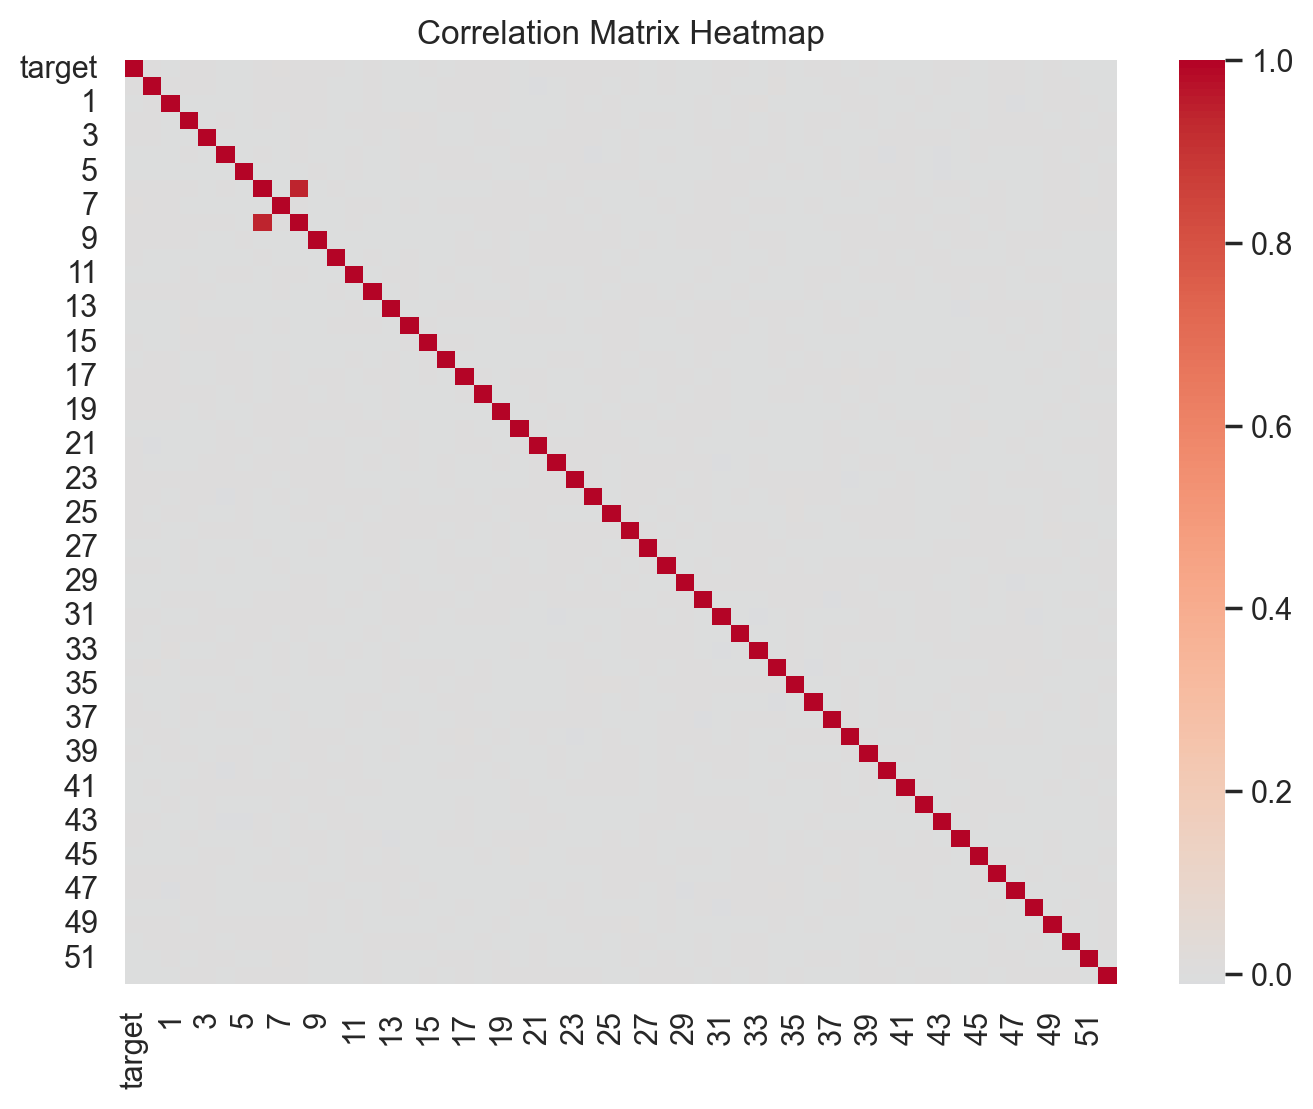

In [14]:
corr_matrix = df.iloc[:, :].corr()
plt.figure(figsize=(8, 6))  # Set the size of the plot
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

linear correlation is 0 between features and as well with target, need to look for non-linear correlation (can use visual analysis, vif values, ml models). features 6 and 8 are correlated, one can be dropped

<AxesSubplot: >

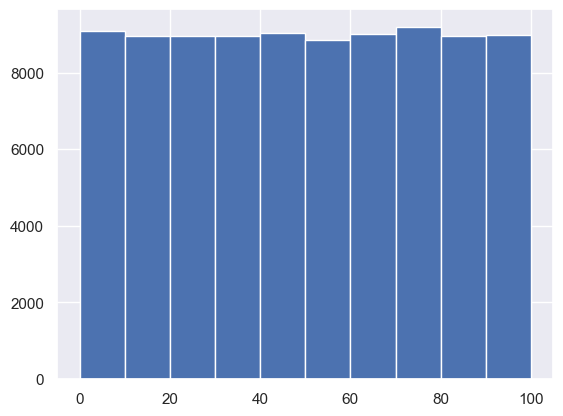

In [10]:
df["target"].hist()

uniform distribution

In [15]:
_, to_drop = drop_corr_func_with_col(df, 'target')
to_drop

[]

drop features where corr > 0.95, there is no such features

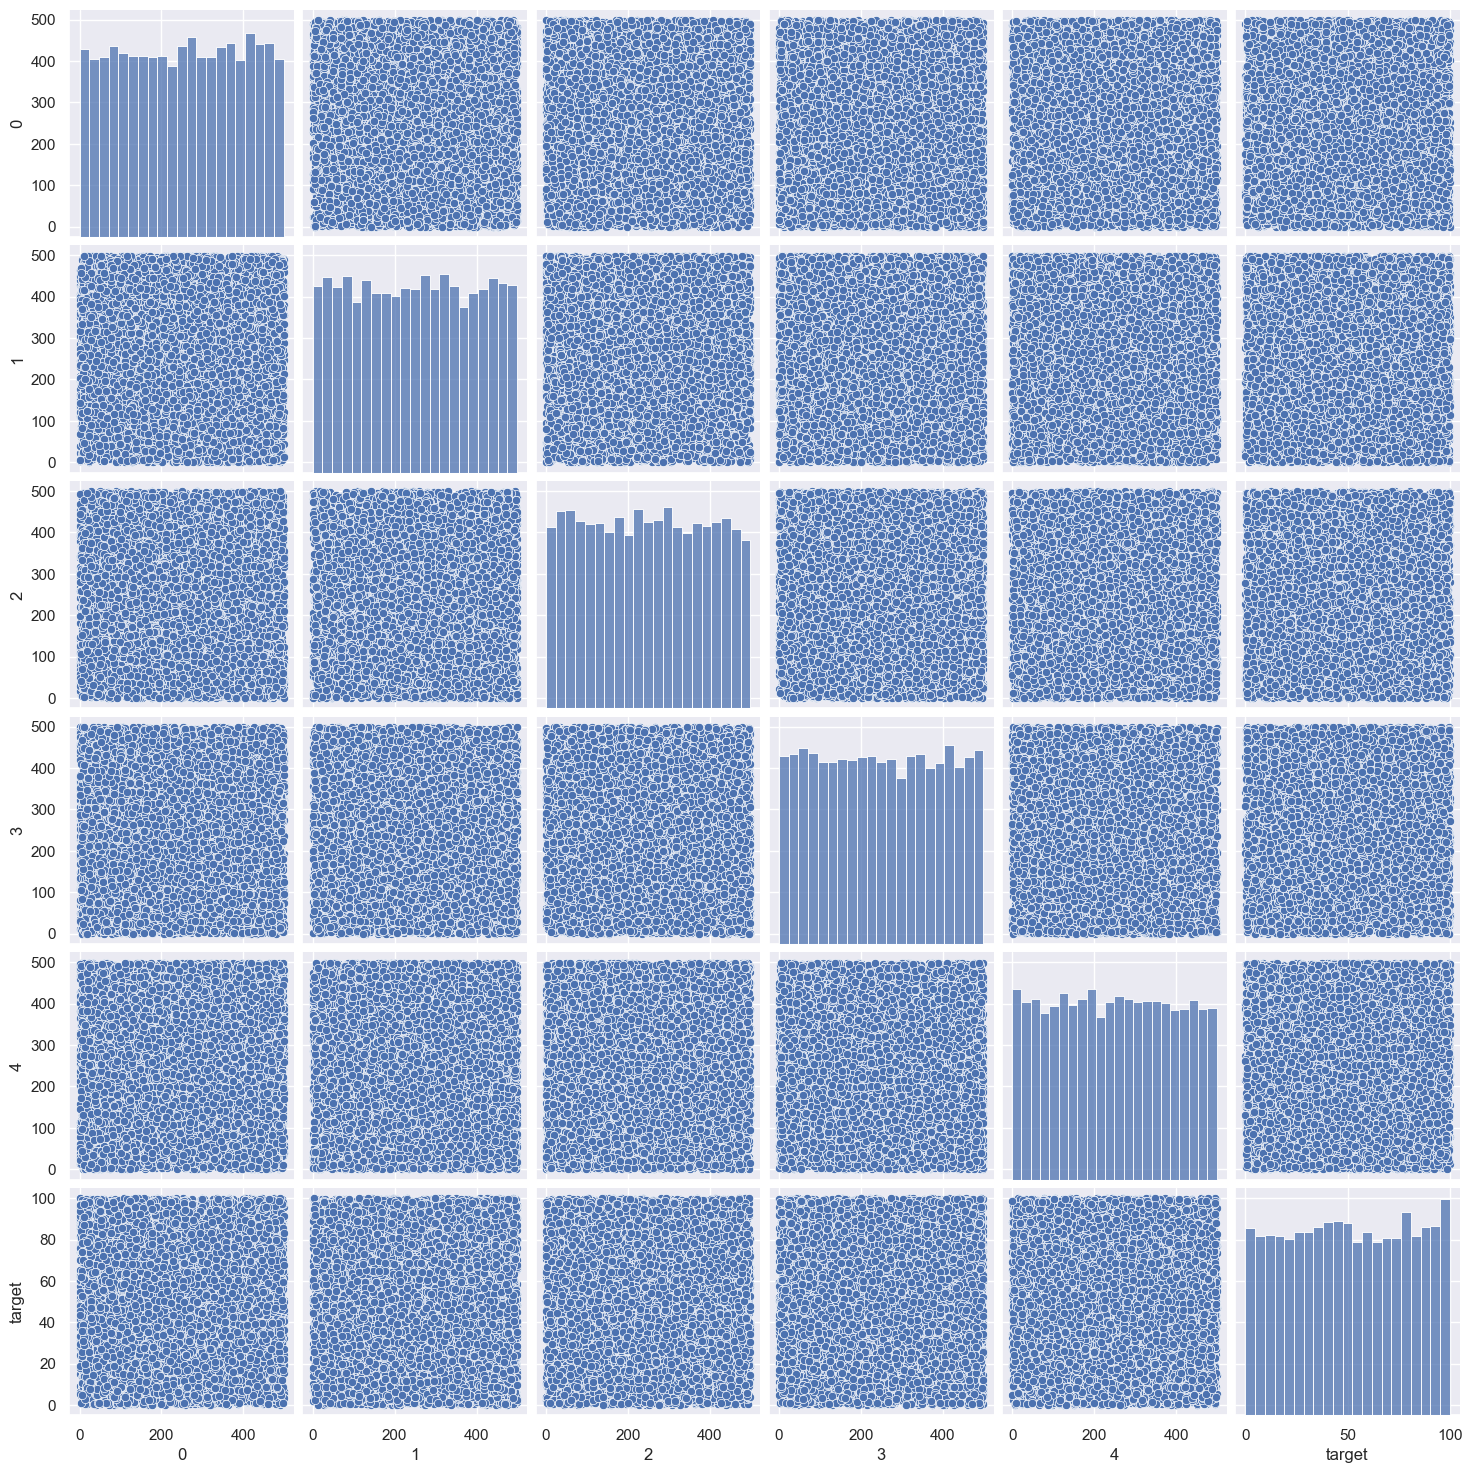

In [5]:
%config InlineBackend.figure_format = 'png'
sns.pairplot(df.iloc[:, [0,1,2,3,4,-1]][::10]);

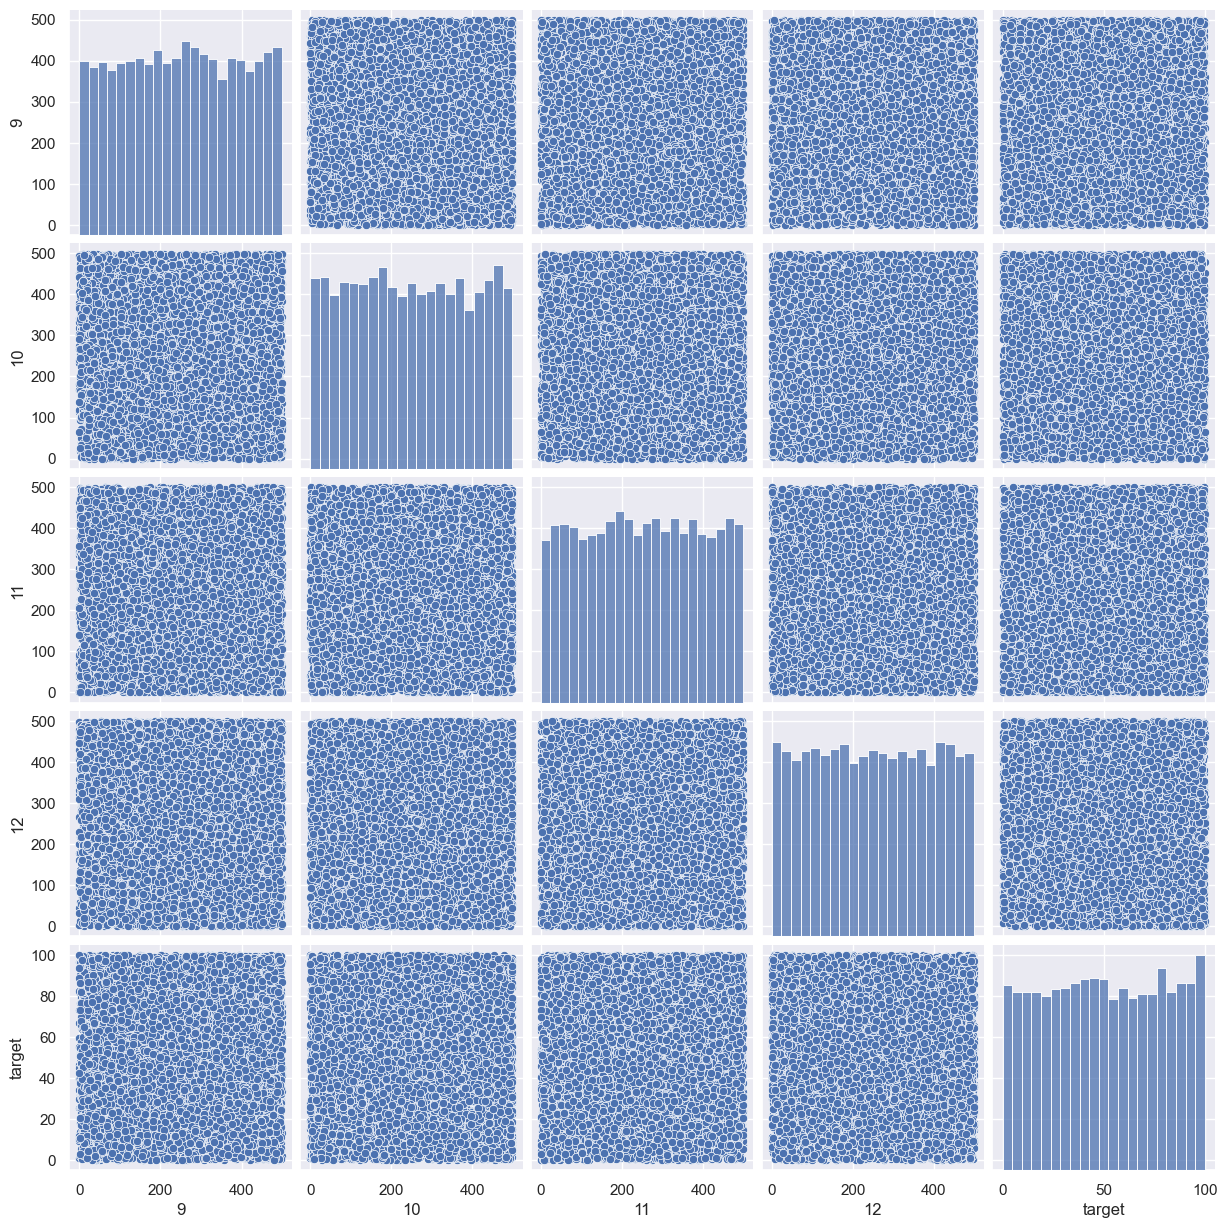

In [6]:
%config InlineBackend.figure_format = 'png'
sns.pairplot(df.iloc[:, [9,10,11,12,-1]][::10]);

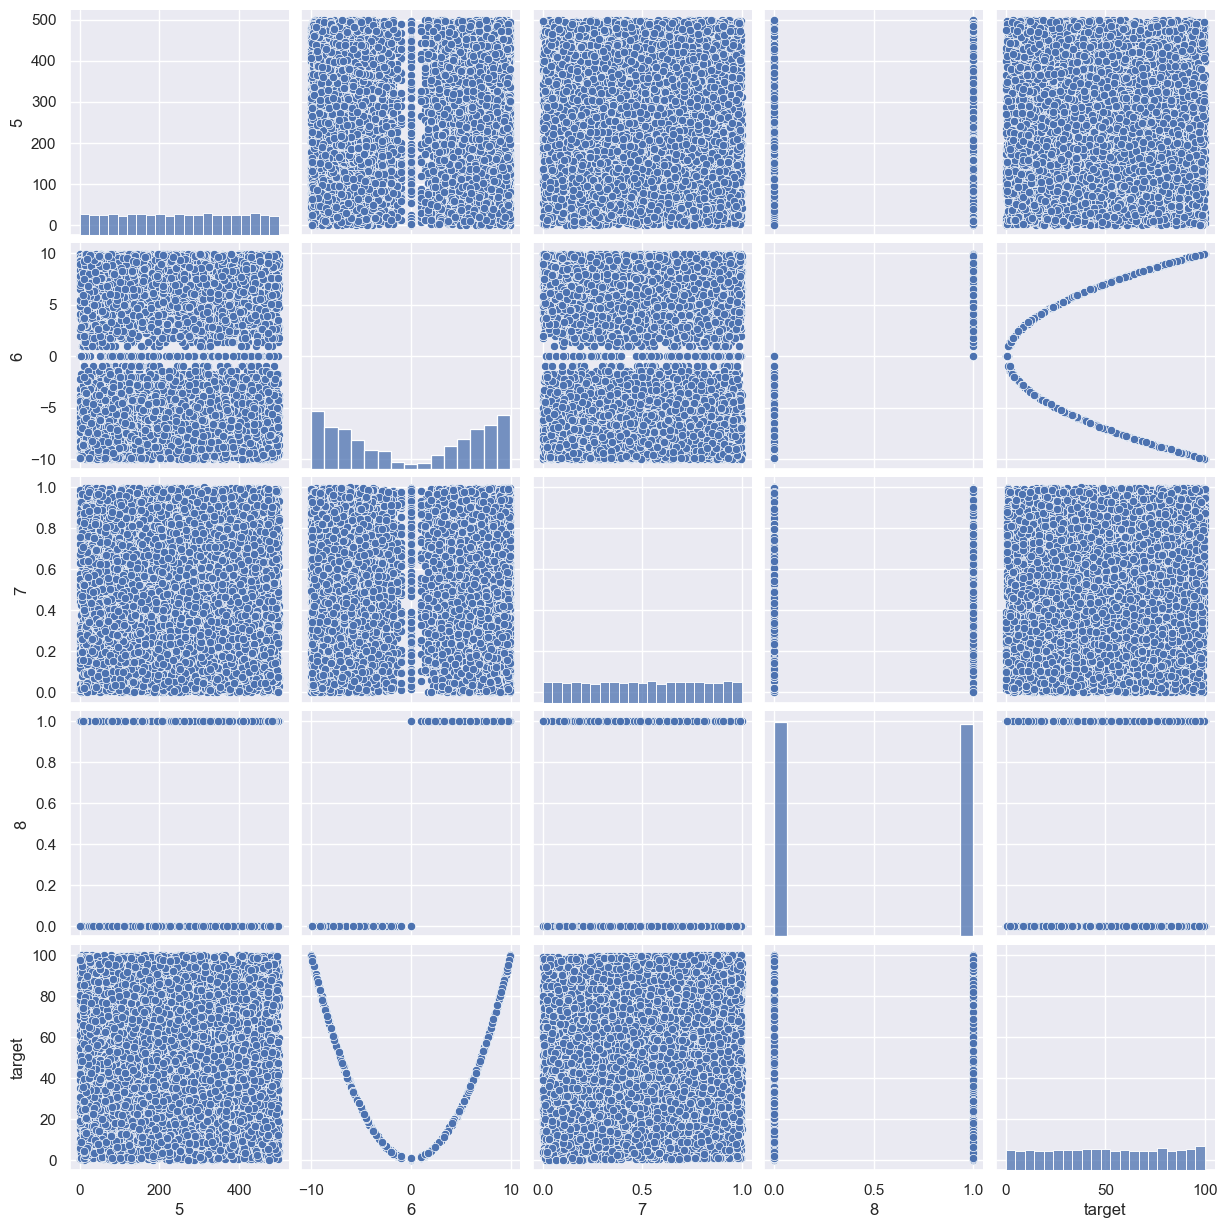

In [8]:
%config InlineBackend.figure_format = 'png'
sns.pairplot(df.iloc[:, [5, 6,7, 8,-1]][::10]);

obvious quadratic relation between target and feature 6

In [22]:
df['target_bins'] = pd.qcut(df.target, 5, labels=[0,1,2,3,4])

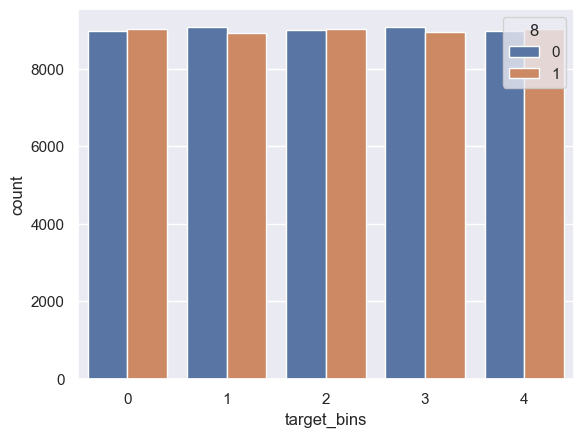

In [34]:
# relation between target and 8 binary feature - there is no any relation
sns.countplot(x="target_bins", hue="8", data=df);

In [33]:
#feature is squared to get linear relation
df['6_squared'] = df['6'] ** 2

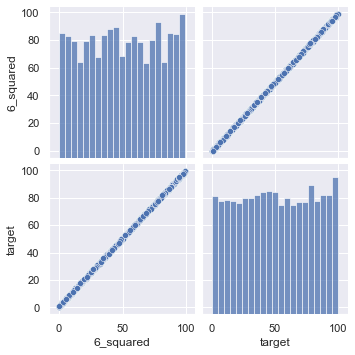

In [34]:
%config InlineBackend.figure_format = 'png'
sns.pairplot(df.loc[:, ['6_squared', 'target']][::10]);

In [67]:
df['residuals'] = df['target'] - df['6_squared']

In [45]:
df[['6_squared', 'target']].to_csv('data/df_train.csv', index=False)

In [73]:
df_test = pd.read_csv('data/hidden_test.csv', usecols=['6'])
df_train = df[['6']]

(array([0.09698615, 0.08572973, 0.07376978, 0.06613149, 0.05829219,
        0.04733728, 0.0372869 , 0.02251285, 0.01658312, 0.        ,
        0.01015088, 0.01407053, 0.02462343, 0.03477431, 0.04492519,
        0.05537758, 0.05919673, 0.07738791, 0.08633275, 0.09356902]),
 array([-9.94987437, -8.95488693, -7.9598995 , -6.96491206, -5.96992462,
        -4.97493719, -3.97994975, -2.98496231, -1.98997487, -0.99498744,
         0.        ,  0.99498744,  1.98997487,  2.98496231,  3.97994975,
         4.97493719,  5.96992462,  6.96491206,  7.9598995 ,  8.95488693,
         9.94987437]),
 <a list of 20 Patch objects>)

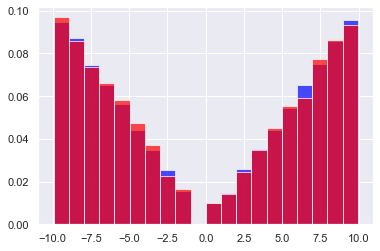

In [84]:
# data shift - there is no data shift in feature
plt.hist(df_train['6'], bins=20, alpha=0.7, color='blue', normed=True)
plt.hist(df_test['6'], bins=20, alpha=0.7, color='red', normed=True)